### CSC 478 HW 1
#### Sriram Yarlagadda
#### Due: Thursday, April 14th

In [92]:
%reset
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

os.chdir("/Users/Sriram/Desktop/DePaul/Q3/CSC478")

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#### Question 1:
Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

In [93]:
df = pd.read_csv('./bank_data.csv', index_col =0 )

Here are the basic summary statistics of the numerical variables:

In [94]:
df.describe()

,age,income,children
count,600.000000,600.000000,600.000000
mean,42.395000,27524.031217,1.011667
std,14.424947,12899.468246,1.056752
min,18.000000,5014.210000,0.000000
25%,30.000000,17264.500000,0.000000
50%,42.000000,24925.300000,1.000000
75%,55.250000,36172.675000,2.000000
max,67.000000,63130.100000,3.000000


Here are the counts of the categorical variables:

gender : 
MALE      300
FEMALE    300
Name: gender, dtype: int64 



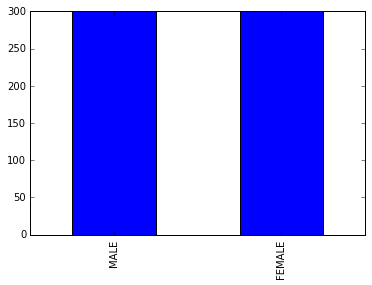

region : 
INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64 



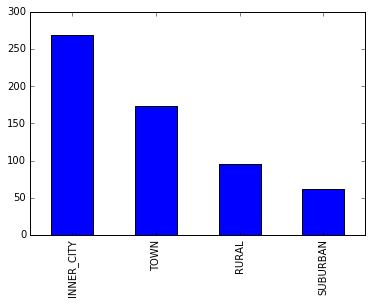

married : 
YES    396
NO     204
Name: married, dtype: int64 



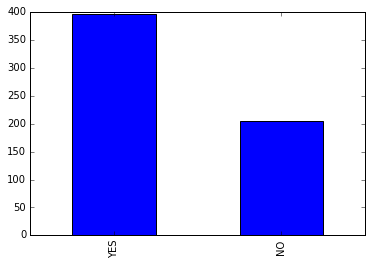

savings_acct : 
YES    414
NO     186
Name: savings_acct, dtype: int64 



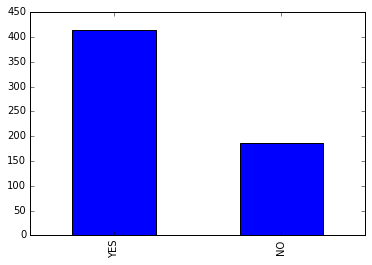

current_acct : 
YES    455
NO     145
Name: current_acct, dtype: int64 



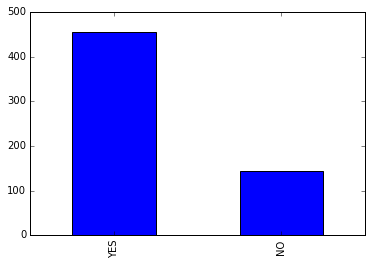

mortgage : 
NO     391
YES    209
Name: mortgage, dtype: int64 



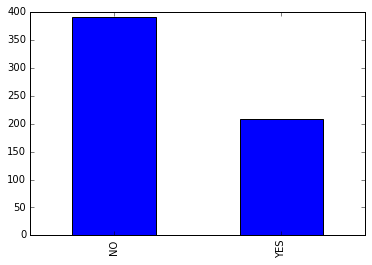

pep : 
NO     326
YES    274
Name: pep, dtype: int64 



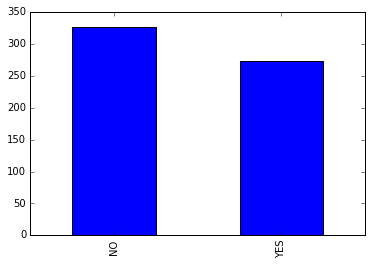

In [95]:
for name in ['gender', 'region', 'married', 'savings_acct', 'current_acct', 'mortgage', 'pep']:
    print name,':', '\n', df[name].value_counts(), '\n'
    df[name].value_counts().plot(kind = "bar")
    plt.show()
    

#### Question 2:

Suppose that because of the bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.

In [96]:
df_pep = df[df['pep'] == 'YES']
df_npep = df[df['pep'] == 'NO']

In [97]:
result = df_pep.mean() - df_npep.mean()
print "Difference between pep = 'YES' and pep = 'NO':"
result

Difference between pep = 'YES' and pep = 'NO':


age            5.029578
income      5743.966078
children      -0.122229
dtype: float64

Based on the table above, which shows the difference between the category of customers with a personal equity plan and those without across the age, income, and number of children variables, we can see that customers who have a personal equity plan are older by approximately **5 years**, richer by **$ 5700**, and have ***slightly*** fewer children. 

We now take a look at the categorical variables:

In [98]:
for name in ['gender', 'region', 'married', 'savings_acct', 'current_acct', 'mortgage']:
    print '\n', name, ':\n with pep as Yes: \n',df_npep[name].value_counts(), '\n\n with pep as No: \n', df_pep[name].value_counts()


gender :
 with pep as Yes: 
FEMALE    170
MALE      156
Name: gender, dtype: int64 

 with pep as No: 
MALE      144
FEMALE    130
Name: gender, dtype: int64

region :
 with pep as Yes: 
INNER_CITY    146
TOWN          102
RURAL          50
SUBURBAN       28
Name: region, dtype: int64 

 with pep as No: 
INNER_CITY    123
TOWN           71
RURAL          46
SUBURBAN       34
Name: region, dtype: int64

married :
 with pep as Yes: 
YES    242
NO      84
Name: married, dtype: int64 

 with pep as No: 
YES    154
NO     120
Name: married, dtype: int64

savings_acct :
 with pep as Yes: 
YES    235
NO      91
Name: savings_acct, dtype: int64 

 with pep as No: 
YES    179
NO      95
Name: savings_acct, dtype: int64

current_acct :
 with pep as Yes: 
YES    244
NO      82
Name: current_acct, dtype: int64 

 with pep as No: 
YES    211
NO      63
Name: current_acct, dtype: int64

mortgage :
 with pep as Yes: 
NO     209
YES    117
Name: mortgage, dtype: int64 

 with pep as No: 
NO     182
Y

As seen above, slightly lower proportion of those without PEP are married than those with PEP.  All the other categorical variables are showing approximately similar distribution for pep = NO and pep = YES.

#### Question 3:
Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

Here are the values of the income variable after z-score normalization:

In [99]:
mean = df.income.mean()
std = df.income.std()
zscore = lambda x: (x-mean)/std
z_income = df['income'].apply(zscore); z_income.head()

id
ID12101   -0.773523
ID12102    0.198541
ID12103   -0.848766
ID12104   -0.554180
ID12105    1.787071
Name: income, dtype: float64

#### Question 4:

Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

Here is the discretized Age variable:

In [107]:
df_mm = df
disc_age = pd.qcut(df.age, [0,0.33,0.66,1], labels = ['young','mid-age','old'], retbins = True ); pd.Series(disc_age).head()

0    id
ID12101    mid-age
ID12102    mid-age
ID121...
1                             [18.0, 35.0, 49.0, 67.0]
dtype: object

#### Question 5:

Use Min-Max Normalization to transform the values of all numeric attributes in the original table (income, age, children) onto the range 0.0-1.0.

Here is the dataframe with all the numerical variables normalized using min-max normalization:

In [110]:
minmax = lambda x: (x-x.min())/(x.max()-x.min()) 
df_mm_vals = df_mm[['age','income','children']].apply(minmax, 0)
df_mm.age = df_mm_vals.age; df_mm.income = df_mm_vals.income; df_mm.children = df_mm_vals.children
df_mm.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
id,,,,,,,,,,,
ID12101,0.612245,0.215634,0.333333,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
ID12102,0.448980,0.431395,1.000000,MALE,TOWN,YES,YES,NO,YES,YES,NO
ID12103,0.673469,0.198933,0.000000,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
ID12104,0.102041,0.264320,1.000000,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
ID12105,0.795918,0.783987,0.000000,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


#### Question 6:

Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). Then numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

In [111]:
bank_numeric = pd.get_dummies(df_mm)
bank_numeric.to_csv('bank_numeric.csv', float_format='%1.2f')

#### Question 7

Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can do this by using the corr() function in Pandas or corrcoef function in NumPy].

Here is the correlation matrix:

In [112]:
bank_numeric.corr()

,age,income,children,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,...,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,pep_NO,pep_YES
age,1.000000,0.752726,0.023572,0.090081,-0.090081,-0.025171,0.018635,0.031345,-0.008510,-0.010394,...,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.173825,0.173825
income,0.752726,1.000000,0.036761,0.023845,-0.023845,-0.047564,0.084776,0.029824,-0.036431,0.008386,...,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.221991,0.221991
children,0.023572,0.036761,1.000000,0.014206,-0.014206,-0.051222,0.089902,-0.014122,-0.007033,0.048716,...,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.057663,-0.057663
gender_FEMALE,0.090081,0.023845,0.014206,1.000000,-1.000000,-0.023459,-0.009092,-0.010951,0.040472,0.021110,...,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,0.046843,-0.046843
gender_MALE,-0.090081,-0.023845,-0.014206,-1.000000,1.000000,0.023459,0.009092,0.010951,-0.040472,-0.021110,...,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,-0.046843,0.046843
region_INNER_CITY,-0.025171,-0.047564,-0.051222,-0.023459,0.023459,1.000000,-0.393444,-0.306032,-0.573814,-0.003254,...,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,-0.001054,0.001054
region_RURAL,0.018635,0.084776,0.089902,-0.009092,0.009092,-0.393444,1.000000,-0.148158,-0.277798,0.022649,...,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.019714,0.019714
region_SUBURBAN,0.031345,0.029824,-0.014122,-0.010951,0.010951,-0.306032,-0.148158,1.000000,-0.216080,-0.012483,...,0.061184,-0.061184,-0.002605,0.002605,-0.038157,0.038157,-0.004635,0.004635,-0.062508,0.062508
region_TOWN,-0.008510,-0.036431,-0.007033,0.040472,-0.040472,-0.573814,-0.277798,-0.216080,1.000000,-0.006369,...,-0.041604,0.041604,-0.068654,0.068654,0.027431,-0.027431,-0.036591,0.036591,0.059115,-0.059115
married_NO,-0.010394,0.008386,0.048716,0.021110,-0.021110,-0.003254,0.022649,-0.012483,-0.006369,1.000000,...,-0.009571,0.009571,0.028604,-0.028604,-0.059996,0.059996,-0.021711,0.021711,-0.189578,0.189578


Based on the correlation matrix above, we see that there is a strong positive correlation between *age* and *income* variables with pearson correlation coefficient of **0.75**. Additionally, as we would expect, all of the dummy variables that are derived from the a parent variable with only 2 classes have a perfect negative correlation of **-1** with eachother. 

#### Question 8:

Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?

Here is a scatter plot between the non-normalized Income and Age attributes:

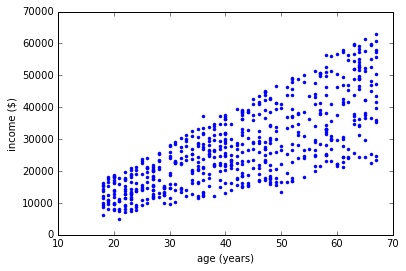

In [114]:
df = pd.read_csv('./bank_data.csv', index_col =0)
plt.figure()
plt.plot(df.age, df.income, ".")
plt.ylabel("income ($)")
plt.xlabel("age (years)")

Based on the scatterplot above, it appears that there is a positive correlation between the two variables -- an increase in age corresponds to an increase in the income. 


#### Question 9:
Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).

Histogram for non-normalized Income:

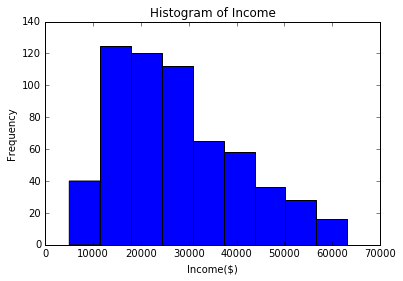

In [115]:
df.income.plot(kind='hist', bins = 9)
plt.xlabel('Income($)')
plt.title('Histogram of Income')

Histogram for non-normalized Age:

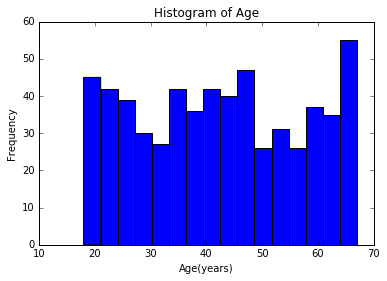

In [116]:
df.age.plot(kind = 'hist', bins = 16)
plt.xlabel('Age(years)')
plt.title('Histogram of Age')

#### Question 10:

Using a bargraph, plot the distribution of the values of the region attribute.

Here is the bargraph of the region attribute:

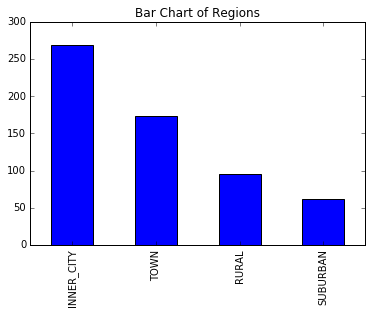

In [117]:
df['region'].value_counts().plot(kind = "bar")
plt.title('Bar Chart of Regions')

#### Question 11

Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations fucntions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

In [118]:
pd.crosstab(df.region, df.pep)

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


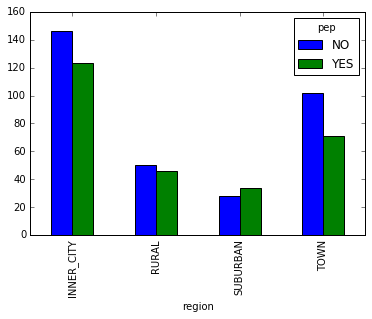

In [119]:
pd.crosstab(df.region, df.pep).plot(kind = 'bar')

I have good working knowledge of Python including various libraries such as SkLearn, NumPy, Pandas etc. I also have knowledge and experience in using R for data science related work. In addition, I have worked with Mathlab and SPSS. I have a strong Math background with a focus on Statistics and 